Wahlpflichtfach Künstliche Intelligenz II: Praktikum 

---

# 02 - Übungsaufgaben Neuronale Netze mit Tensorflow


In [15]:
%matplotlib inline

## Data Understanding
Laden Sie die Daten und machen Sie sich mit ihnen vertraut. Den Datensatz finden Sie unter folgendem [Link](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

In [18]:
import pandas as pd

from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


KeyboardInterrupt: 

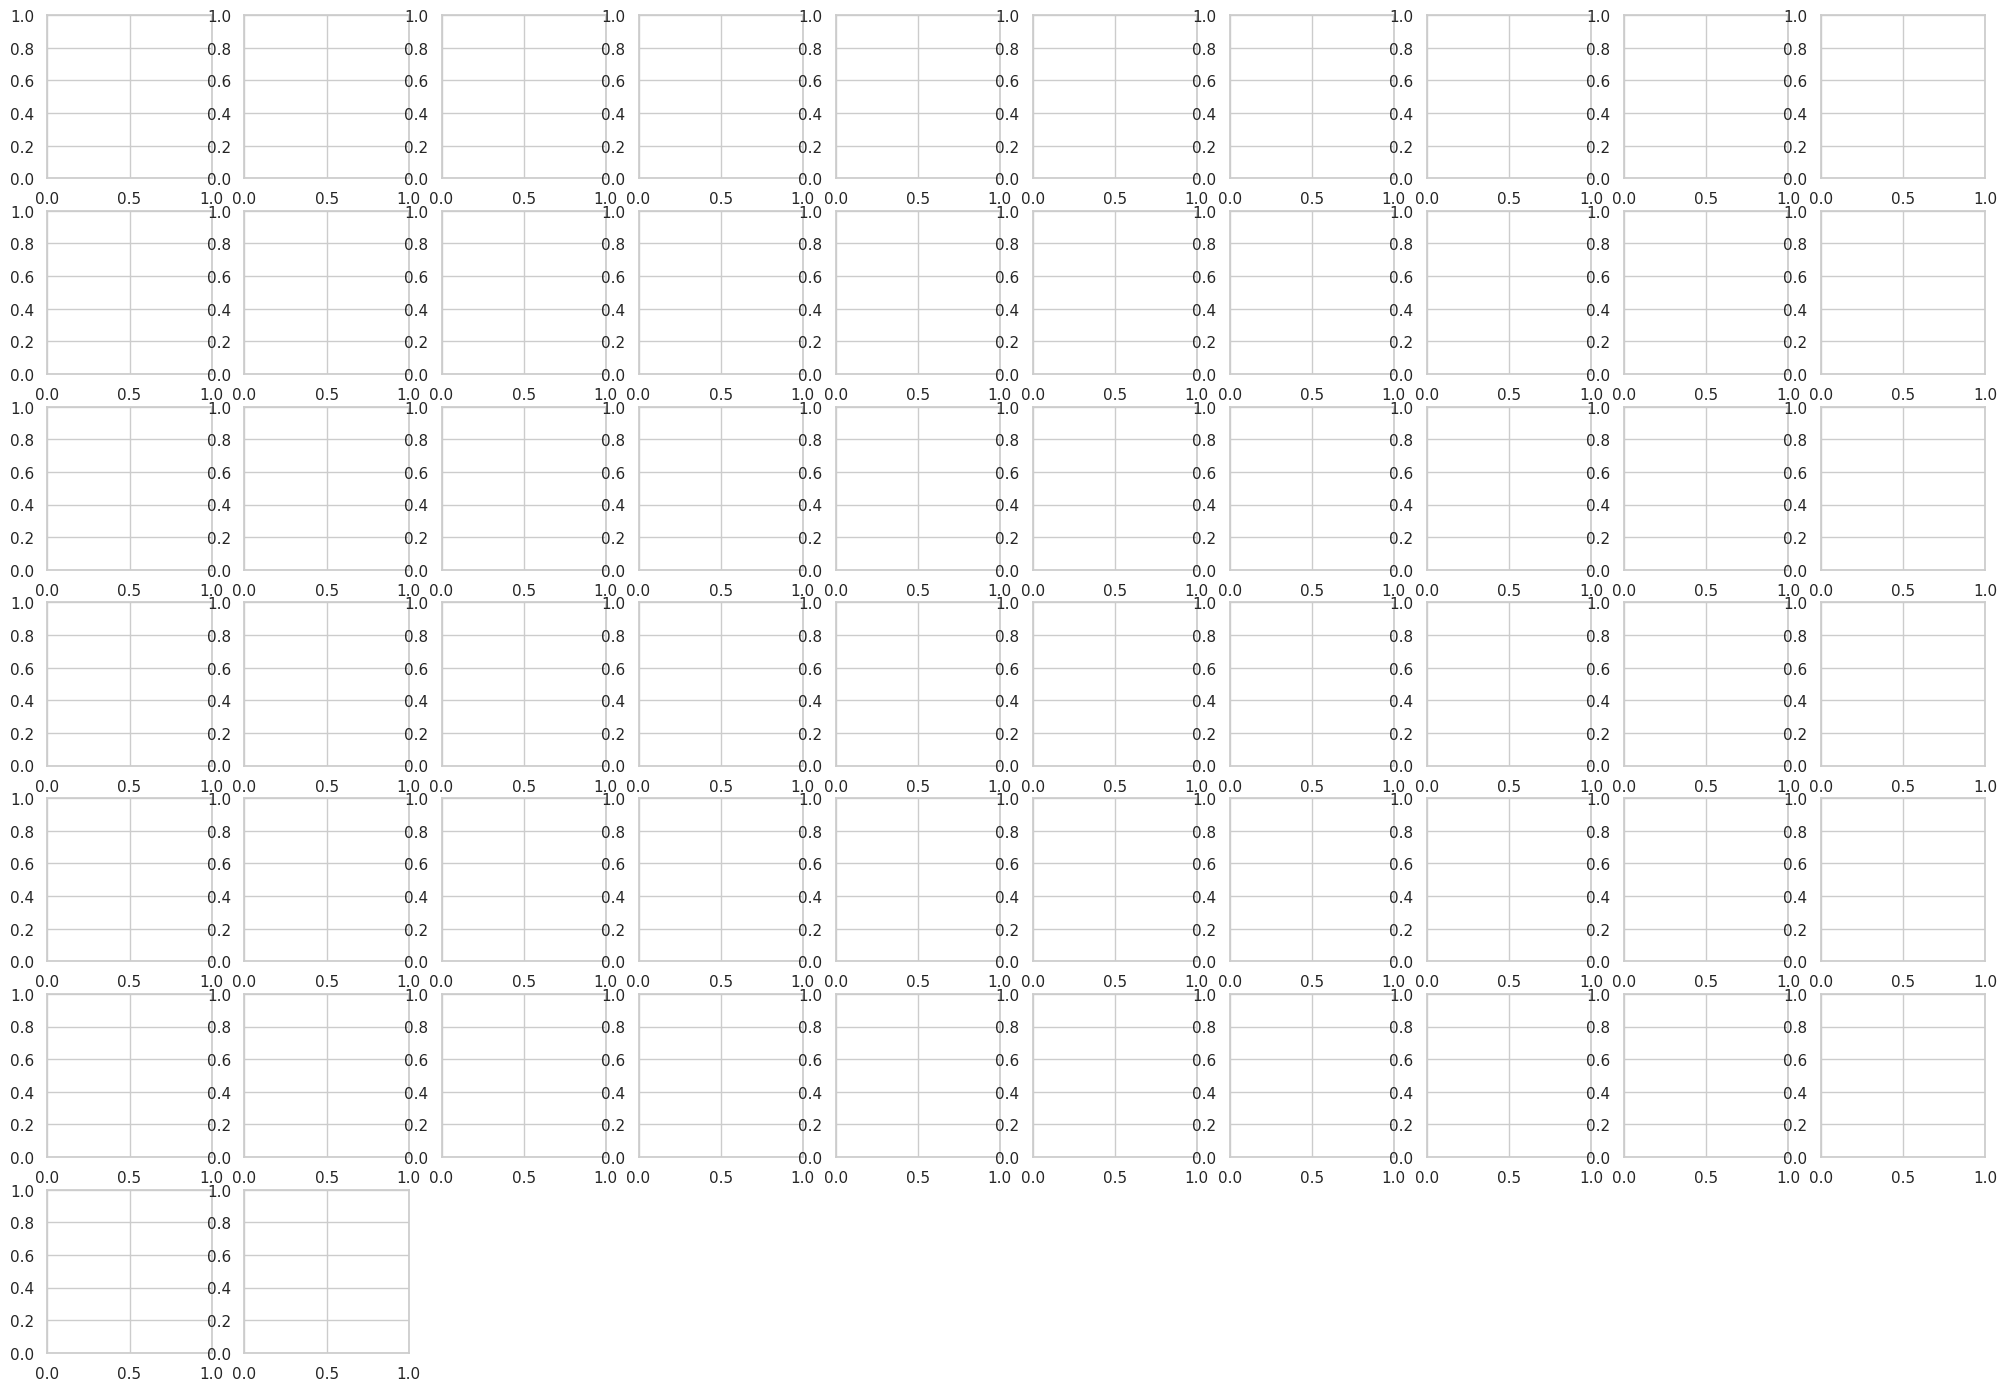

In [17]:
import seaborn as sns


sns.set_theme(style="whitegrid")
sns.pairplot(df, hue="target")

## Data Preperation
_Hinweis: Da die Daten hier fertig aufbereitet sind müssen Sie nur den Train/Test-Split durchführen_

In [19]:
from sklearn.model_selection import train_test_split

x = df.drop("target", axis=1)
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Modeling
Ihre nächste Aufgabe ist es das Training vorzubereiten und den richtigen ML-Algorithmus auszuwählen. Dafür müssen Sie die folgenden Teilaufgaben erledigen:
* a) Erstellen sie ein Multilayer Perceptron
* b) Entscheiden sie sich für eine Loss-Funktion, Optimierer und geeignete Metriken. Zusätzlich erstellen sie ein Tensorboard.
* c) Trainieren sie das neuronale Netz

### a) Erstellen sie ein Multilayer Perceptron
Denken sie an die Initialisierung der Gewichte im Layer sowie die Wahl der Aktivierungsfunktion

In [39]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation="relu", input_dim=10))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))

### b) Loss-Funktion, Optimierer und Metriken

In [40]:
from keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.1),
    loss="mean_squared_error",
    metrics=[
        "mean_squared_error",
        "mean_absolute_error",
    ]
)

#### c) Trainieren des neuronale Netz

In [42]:
from datetime import datetime
from keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(
    log_dir=f"../logs/fit/{datetime.now().strftime('%Y%m%d-%H%M%S')}", 
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
)

model.fit(
    x=x_train, 
    y=y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=25,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
 1/12 [=>............................] - ETA: 0s - loss: 2328.2278 - mean_squared_error: 2328.2278 - mean_absolute_error: 38.0075

12/12 [==============================] - 0s 7ms/step - loss: 3254.2642 - mean_squared_error: 3254.2642 - mean_absolute_error: 45.7870 - val_loss: 3386.2302 - val_mean_squared_error: 3386.2302 - val_mean_absolute_error: 44.7531
Epoch 2/10
12/12 [==============================] - 0s 5ms/step - loss: 3264.8499 - mean_squared_error: 3264.8499 - mean_absolute_error: 46.7630 - val_loss: 3321.9917 - val_mean_squared_error: 3321.9917 - val_mean_absolute_error: 45.7965
Epoch 3/10
12/12 [==============================] - 0s 5ms/step - loss: 3327.5457 - mean_squared_error: 3327.5454 - mean_absolute_error: 46.2895 - val_loss: 3390.1731 - val_mean_squared_error: 3390.1731 - val_mean_absolute_error: 46.6808
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 3248.1052 - mean_squared_error: 3248.1052 - mean_absolute_error: 45.1557 - val_loss: 3305.7378 - val_mean_squared_error: 3305.7378 - val_mean_absolute_error: 46.3293
Epoch 5/10
12/12 [==============================] - 0s 5ms/

## Evaluation
Verwenden sie die Metriken sowie für das Problem geeignete Visualisierungen und erläutern sie ihre Ergebnisse.

In [43]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 2984.4495 - mean_squared_error: 2984.4495 - mean_absolute_error: 43.2138


[2984.449462890625, 2984.449462890625, 43.213844299316406]

3/3 [==============================] - 0s 1ms/step


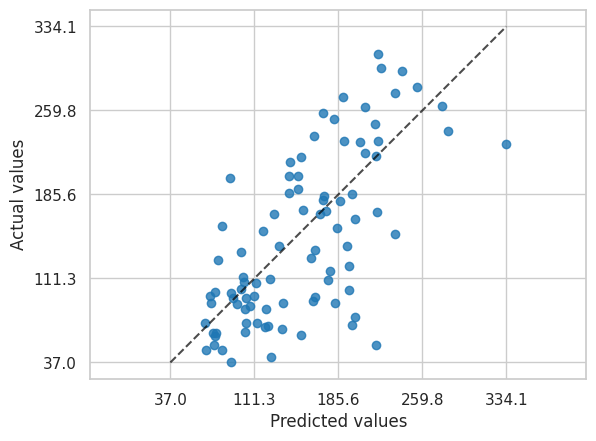

In [63]:
from sklearn.metrics import PredictionErrorDisplay

PredictionErrorDisplay.from_predictions(
    y_test, 
    model.predict(x_test).flatten(),
    kind="actual_vs_predicted",
)


3/3 [==============================] - 0s 1ms/step


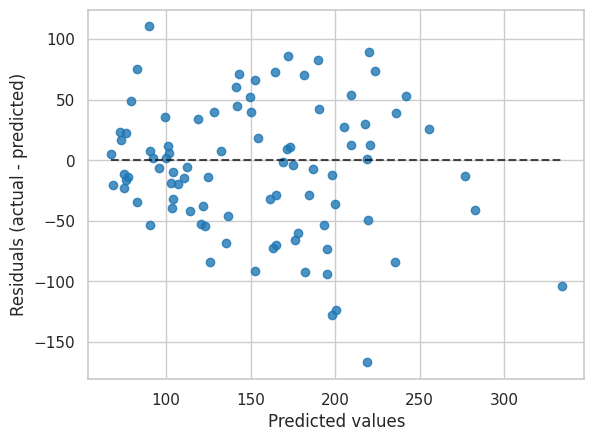

In [64]:
PredictionErrorDisplay.from_predictions(
    y_test, 
    model.predict(x_test).flatten(),
    kind="residual_vs_predicted",
)

---

Wahlpflichtach Künstliche Intelligenz II: Praktikum 